### k-NN Classification

In [97]:
import numpy as np
import math
import operator 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier 
images, labels = load_digits(2, return_X_y=True)

# Labeled training set
training_images = images[:300]
training_labels = labels[:300]

# Labeled test set
test_images = images[300:]
test_labels = labels[300:]

### k-NN Classification Using 2-D Features

##### Compute top 2 principal componets and calculate the feature matrix of the training images data

In [98]:
u, s, vT = np.linalg.svd(training_images.transpose())
C = np.matmul(training_images.transpose(), training_images)
w, v = np.linalg.eig(C)
topEigenVectors = v[:,:2]
trainingData = np.matmul(training_images, topEigenVectors)

##### Display 2-D features of traing images on a scatter plot (green=1, red=0)

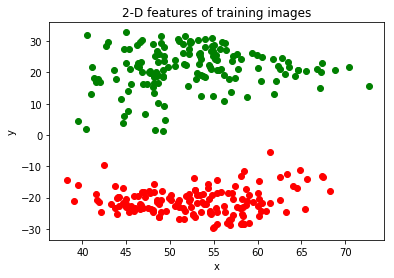

In [106]:
x1 = []
y1 = []
for i in range(300):
    if(training_labels[i] == 1):
        x1.append(trainingData[i][0])
        y1.append(trainingData[i][1])
x0 = []
y0 = []
for i in range(300):
    if(training_labels[i] == 0):
        x0.append(trainingData[i][0])
        y0.append(trainingData[i][1])
plt.scatter(x1, y1, c='green')
plt.scatter(x0, y0, c='r')
plt.title('2-D features of training images')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### Transform the test data using the top two principal components

In [100]:
testData = np.matmul(test_images, principalComponents)

In [101]:
def euclideanDistance(instance1, instance2):
    distance = 0
    for x in range(len(instance1)):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [102]:
def getNeighbors(trainingData, testInstance, k):
    distances = []
    for x in range(len(trainingData)):
        dist = euclideanDistance(testInstance, trainingData[x])
        distances.append((trainingData[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [103]:
def getClassifer(neighbors):
    dictOfClassifiers = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in dictOfClassifiers:
            dictOfClassifiers[response] += 1
        else:
            dictOfClassifiers[response] = 1
    sortedVotes = sorted(dictOfClassifiers.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

#### k-NN classification on the test data with a scatter plot showing outcomes. Blue points were classified correctly, black points were classified incorrectly

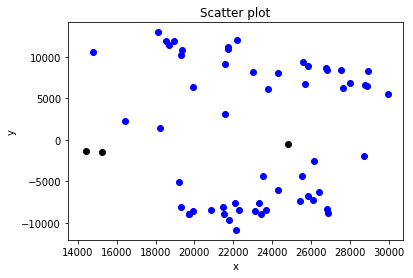

In [104]:
pred_testLabels = []
training_labels = training_labels.reshape(300,1)
trainingData_labels = np.hstack((trainingData,training_labels))
for i in range(len(testData)):
    neighbors = getNeighbors(trainingData_labels, testData[i], 5)
    pred_testLabels.append(getClassifier(neighbors))
testCorrect_x = []
testCorrect_y = []
for i in range(len(testData)):
    if(pred_testLabels[i] == test_labels[i]):
        testCorrect_x.append(testData[i][0])
        testCorrect_y.append(testData[i][1])
testIncorrect_x = []
testIncorrect_y = []
for i in range(len(testData)):
    if(pred_testLabels[i] != test_labels[i]):
        testIncorrect_x.append(testData[i][0])
        testIncorrect_y.append(testData[i][1])
plt.scatter(testCorrect_x, testCorrect_y, c='blue')
plt.scatter(testIncorrect_x, testIncorrect_y, c='black')
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Average Classifcation Error

In [89]:
error = 0
for i in range(60):
    if(pred_testLabels[i] != test_labels[i]):
        error += 1
print(error/60)

0.05


### k-NN Classification Using Higher-dimensional Features

In [90]:
C = np.matmul(training_images.transpose(), training_images)
w, v = np.linalg.eig(C)
sum = 0
for i in range(len(w)):
    sum += w[i]
target_sum = sum*.95
sum = 0
top_eigenvalues = []
for i in range(len(w)):
    top_eigenvalues.append(w[i])
    sum += w[i]
    if(sum >= target_sum):
        break
principal_components = np.zeros(shape=(64,len(top_eigenvalues)))
for i in range(len(top_eigenvalues)):
    principal_components[:,i] = v[:,i]
newTrainingData = np.matmul(training_images, principal_components)

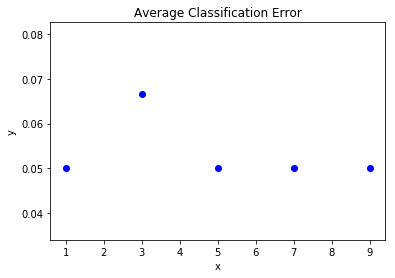

In [94]:
newTestData = np.matmul(test_images, principal_components)
newTrainingData_labels = np.hstack((newTrainingData,training_labels))
x = [1, 3, 5, 7, 9]
y = []
for iter in [1,3,5,7,9]:
    pred_testLabels = []
    for i in range(len(testData)):
        neighbors = getNeighbors(newTrainingData_labels, testData[i], iter)
        pred_testLabels.append(getResponse(neighbors))
    error = 0
    for i in range(60):
        if(pred_testLabels[i] != test_labels[i]):
            error += 1
    y.append(error/60)
plt.scatter(x, y, c='blue')
plt.title('Average Classification Error')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Based on this plot I would choose a k this is not too big or too small. If it is too big you grab points that could be really far away and if your k is too small you don't have enough information to correctly classify the points. In this case, when trying to classify a point as a 0 or 1, I would choose k=5. Also, it is always better to take odd values for binary classification to avoid ties.